In [1]:
pip list

Package                      Version
---------------------------- ---------------
absl-py                      1.3.0
aequitas-lite                0.43.4
aiohttp                      3.8.4
aiosignal                    1.3.1
altair                       4.2.2
anyio                        3.6.1
argon2-cffi                  21.3.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.0.8
astunparse                   1.6.3
async-lru                    2.0.4
async-timeout                4.0.2
attrs                        23.2.0
Babel                        2.10.3
backcall                     0.2.0
beautifulsoup4               4.11.1
bleach                       5.0.1
blis                         0.7.9
bokeh                        3.2.1
cachetools                   5.2.0
catalogue                    2.0.8
certifi                      2022.9.24
cffi                         1.15.1
charset-normalizer           2.1.1
click                        8.1


[notice] A new release of pip is available: 23.0.1 -> 23.3.2
[notice] To update, run: C:\Users\snikh\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip


In [1]:
# for visualization
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import opendatasets as od   # to download datasets by url
import pandas as pd   # for working with datasets
import numpy as np    # for numerical computing
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10,6)
#matplotlib.rcParams['figure.facecolor'] = '#000000'

In [2]:
ross_df = pd.read_csv('rossmann-store-sales/train.csv')
store_df = pd.read_csv('rossmann-store-sales/store.csv')
test_df = pd.read_csv('rossmann-store-sales/test.csv')
submission_df = pd.read_csv('rossmann-store-sales/sample_submission.csv')

C:\Users\snikh\AppData\Local\Temp\ipykernel_14020\1184408281.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  ross_df = pd.read_csv('rossmann-store-sales/train.csv')


In [3]:
ross_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [4]:
store_df.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [5]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [6]:
merged_df.shape

(1017209, 18)

In [7]:
merged_test_df = test_df.merge(store_df, how='left', on='Store')
merged_test_df.shape

(41088, 17)

In [8]:
test_df.columns

Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

In [9]:
ross_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

In [10]:
des_df = round(merged_df.describe().T,2)
des_df

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


## Preprocessing and Feature Engineering


In [11]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

### Date

First, let's convert Date to a datetime column and extract different parts of the date.




In [12]:
def split_date(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['year'] = df.Date.dt.year
    df['month'] = df.Date.dt.month
    df['day'] = df.Date.dt.day
    df['WeekOfYear'] = df.Date.dt.isocalendar().week

In [13]:
split_date(merged_df)
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,...,4.0,2006.0,0,NaN,NaN,NaN,2013,1,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,...,NaN,NaN,0,NaN,NaN,NaN,2013,1,1,1


In [14]:
split_date(merged_test_df)
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,9.0,2008.0,0,NaN,NaN,NaN,2015,9,17,38
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,4.0,2013.0,0,NaN,NaN,NaN,2015,9,17,38
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,10.0,2014.0,0,NaN,NaN,NaN,2015,9,17,38
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,8.0,2000.0,0,NaN,NaN,NaN,2015,9,17,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,...,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,...,4.0,2006.0,0,NaN,NaN,NaN,2015,8,1,31
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,0,NaN,NaN,NaN,2015,8,1,31


### Store Open/Closed


In [15]:
# notice that the sales are zero whenever the store is closed.

merged_df.Open.value_counts()

1    844392
0    172817
Name: Open, dtype: int64

In [16]:


merged_df.shape

(1017209, 22)

In [17]:
merged_df = merged_df[merged_df.Open == 1].copy()
merged_df.shape

(844392, 22)

Instead of trying to model to learn this relationship, it would be better to hard-code it in our predictions, and remove the rows where the store is closed. We won't remove any rows from the test set, since we need to make predictions for every row.



### Competition


Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store.

In [18]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day',
       'WeekOfYear'],
      dtype='object')

Next, we can use the columns CompetitionOpenSince[Month/Year] columns from store_df to compute the number of months for which a competitor has been open near the store.



In [19]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,NaN,NaN,NaN,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,NaN,NaN,NaN,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,NaN,NaN,NaN,2015,7,31,31


In [20]:
def comp_month(df):
    df['CompetitionOpen'] = (12 * (df.year - df.CompetitionOpenSinceYear)) + (df.month - df.CompetitionOpenSinceMonth)
    df['CompetitionOpen'] = df['CompetitionOpen'].map(lambda x:0 if x<0 else x).fillna(0)

In [21]:
(12*(merged_df.year - merged_df.CompetitionOpenSinceYear)) + (merged_df.month - merged_df.CompetitionOpenSinceMonth)

0           82.0
1           92.0
2          103.0
3           70.0
4            3.0
           ...  
1016776     76.0
1016827    159.0
1016863      NaN
1017042      NaN
1017190    130.0
Length: 844392, dtype: float64

In [22]:
comp_month(merged_df)
comp_month(merged_test_df)

In [23]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear,CompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,2008.0,0,NaN,NaN,NaN,2015,9,17,38,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,2013.0,0,NaN,NaN,NaN,2015,9,17,38,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,0,NaN,NaN,NaN,2015,9,17,38,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,2000.0,0,NaN,NaN,NaN,2015,9,17,38,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31,14.0
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,...,2006.0,0,NaN,NaN,NaN,2015,8,1,31,112.0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,0,NaN,NaN,NaN,2015,8,1,31,0.0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,0,NaN,NaN,NaN,2015,8,1,31,0.0


In [24]:
merged_df[['Date', 'CompetitionDistance', 'CompetitionOpenSinceYear', 'CompetitionOpenSinceMonth', 'CompetitionOpen']].sample(5)

,Date,CompetitionDistance,CompetitionOpenSinceYear,CompetitionOpenSinceMonth,CompetitionOpen
226930,2015-01-09,250.0,2008.0,10.0,75.0
744891,2013-09-02,6270.0,2005.0,8.0,97.0
727240,2013-09-18,29070.0,2005.0,4.0,101.0
681944,2013-10-28,8880.0,NaN,NaN,0.0
165883,2015-03-05,1020.0,2012.0,10.0,29.0


### Additional Promotion

We can also add some additional columns to indicate how long a store has been running Promo2 and whether a new round of Promo2 starts in the current month.

In [25]:
merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear,CompetitionOpen
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,2008.0,0,NaN,NaN,NaN,2015,7,31,31,82.0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,2009.0,0,NaN,NaN,NaN,2015,7,31,31,70.0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,2015.0,0,NaN,NaN,NaN,2015,7,31,31,3.0


In [26]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}

    try:
        months = (row(['PromoInterval'] or '' )).split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
        # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.year - df.Promo2SinceYear) + (df.WeekOfYear - df.Promo2SinceWeek)* 7 / 30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [27]:
def check_promo_month(row):
    month2str = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',              
                 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
    try:
        months = (row['PromoInterval'] or '').split(',')
        if row['Promo2Open'] and month2str[row['Month']] in months:
            return 1
        else:
            return 0
    except Exception:
        return 0

def promo_cols(df):
    # Months since Promo2 was open
    df['Promo2Open'] = 12 * (df.year - df.Promo2SinceYear) +  (df.WeekOfYear - df.Promo2SinceWeek)*7/30.5
    df['Promo2Open'] = df['Promo2Open'].map(lambda x: 0 if x < 0 else x).fillna(0) * df['Promo2']
    # Whether a new round of promotions was started in the current month
    df['IsPromo2Month'] = df.apply(check_promo_month, axis=1) * df['Promo2']

In [28]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear,CompetitionOpen
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,2008.0,0,NaN,NaN,NaN,2015,9,17,38,84.0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,2013.0,0,NaN,NaN,NaN,2015,9,17,38,29.0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,2014.0,0,NaN,NaN,NaN,2015,9,17,38,11.0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,2000.0,0,NaN,NaN,NaN,2015,9,17,38,181.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,...,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31,14.0
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,...,2006.0,0,NaN,NaN,NaN,2015,8,1,31,112.0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,0,NaN,NaN,NaN,2015,8,1,31,0.0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,0,NaN,NaN,NaN,2015,8,1,31,0.0


In [29]:
promo_cols(merged_df)
promo_cols(merged_test_df)

In [30]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,82.0,0.000000,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,31,92.0,64.131148,0
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,31,103.0,51.901639,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,NaN,NaN,NaN,2015,7,31,31,70.0,0.000000,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,NaN,NaN,NaN,2015,7,31,31,3.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,76.0,0.000000,0
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,159.0,0.000000,0
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1,0.0,1.213115,0
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,NaN,NaN,NaN,2013,1,1,1,0.0,0.000000,0


In [32]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,...,Promo2SinceWeek,Promo2SinceYear,PromoInterval,year,month,day,WeekOfYear,CompetitionOpen,Promo2Open,IsPromo2Month
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,...,NaN,NaN,NaN,2015,9,17,38,84.0,0.000000,0
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,...,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,9,17,38,105.0,53.508197,0
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,NaN,2015,9,17,38,29.0,0.000000,0
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,...,NaN,NaN,NaN,2015,9,17,38,11.0,0.000000,0
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,...,NaN,NaN,NaN,2015,9,17,38,181.0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,...,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,8,1,31,14.0,24.000000,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,...,NaN,NaN,NaN,2015,8,1,31,112.0,0.000000,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,NaN,2015,8,1,31,0.0,0.000000,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,...,NaN,NaN,NaN,2015,8,1,31,0.0,0.000000,0


### Input and Target Columns


In [31]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'year', 'month', 'day',
       'WeekOfYear', 'CompetitionOpen', 'Promo2Open', 'IsPromo2Month'],
      dtype='object')

In [33]:
merged_df['StateHoliday'] = merged_df['StateHoliday'].replace(0,'0')
merged_test_df['StateHoliday'] = merged_test_df['StateHoliday'].replace(0,'0')

In [34]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'SchoolHoliday', 
              'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpen', 
              'day', 'month', 'year', 'WeekOfYear',  'Promo2', 
              'Promo2Open', 'IsPromo2Month']

target_col = 'Sales'

In [35]:
inputs = merged_df[input_cols].copy()
targets = merged_df[target_col].copy()

In [36]:
test_inputs = merged_test_df[input_cols].copy()

In [37]:
len(test_inputs)

41088

Let's also identify numeric and categorical columns. Note that we can treat binary categorical columns (0/1) as numeric columns.



In [37]:
merged_df[input_cols].head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,day,month,year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,0
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,0
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0


In [38]:
numeric_cols = ['Store', 'Promo', 'SchoolHoliday', 
              'CompetitionDistance', 'CompetitionOpen', 'Promo2', 'Promo2Open', 'IsPromo2Month',
              'day', 'month', 'year', 'WeekOfYear'  ]
categorical_cols = ['DayOfWeek', 'StateHoliday', 'StoreType', 'Assortment']

In [39]:
merged_df.StateHoliday.value_counts()

0    843482
a       694
b       145
c        71
Name: StateHoliday, dtype: int64

In [40]:
targets


0           5263
1           6064
2           8314
3          13995
4           4822
           ...  
1016776     3375
1016827    10765
1016863     5035
1017042     4491
1017190     5961
Name: Sales, Length: 844392, dtype: int64

In [41]:
inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,day,month,year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,5,1,0,1,c,a,1270.0,82.0,31,7,2015,31,0,0.000000,0
1,2,5,1,0,1,a,a,570.0,92.0,31,7,2015,31,1,64.131148,0
2,3,5,1,0,1,a,a,14130.0,103.0,31,7,2015,31,1,51.901639,0
3,4,5,1,0,1,c,c,620.0,70.0,31,7,2015,31,0,0.000000,0
4,5,5,1,0,1,a,a,29910.0,3.0,31,7,2015,31,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,0,a,1,b,a,150.0,76.0,1,1,2013,1,0,0.000000,0
1016827,733,2,0,a,1,b,b,860.0,159.0,1,1,2013,1,0,0.000000,0
1016863,769,2,0,a,1,b,b,840.0,0.0,1,1,2013,1,1,1.213115,0
1017042,948,2,0,a,1,b,b,1430.0,0.0,1,1,2013,1,0,0.000000,0


In [42]:
test_inputs

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpen,day,month,year,WeekOfYear,Promo2,Promo2Open,IsPromo2Month
0,1,4,1,0,0,c,a,1270.0,84.0,17,9,2015,38,0,0.000000,0
1,3,4,1,0,0,a,a,14130.0,105.0,17,9,2015,38,1,53.508197,0
2,7,4,1,0,0,a,c,24000.0,29.0,17,9,2015,38,0,0.000000,0
3,8,4,1,0,0,a,a,7520.0,11.0,17,9,2015,38,0,0.000000,0
4,9,4,1,0,0,a,c,2030.0,181.0,17,9,2015,38,0,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,1111,6,0,0,0,a,a,1900.0,14.0,1,8,2015,31,1,24.000000,0
41084,1112,6,0,0,0,c,c,1880.0,112.0,1,8,2015,31,0,0.000000,0
41085,1113,6,0,0,0,a,c,9260.0,0.0,1,8,2015,31,0,0.000000,0
41086,1114,6,0,0,0,a,c,870.0,0.0,1,8,2015,31,0,0.000000,0


### Impute missing numerical data


In [43]:
inputs[numeric_cols].isna().sum()

Store                     0
Promo                     0
SchoolHoliday             0
CompetitionDistance    2186
CompetitionOpen           0
Promo2                    0
Promo2Open                0
IsPromo2Month             0
day                       0
month                     0
year                      0
WeekOfYear                0
dtype: int64

In [44]:
test_inputs[numeric_cols].isna().sum()

Store                   0
Promo                   0
SchoolHoliday           0
CompetitionDistance    96
CompetitionOpen         0
Promo2                  0
Promo2Open              0
IsPromo2Month           0
day                     0
month                   0
year                    0
WeekOfYear              0
dtype: int64

In [45]:
len(test_inputs)

41088

In [46]:
max_distance = inputs.CompetitionDistance.max()
max_distance

75860.0

In [47]:
inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)
test_inputs['CompetitionDistance'].fillna(max_distance*2, inplace=True)

In [48]:
inputs[numeric_cols].isna().sum()

Store                  0
Promo                  0
SchoolHoliday          0
CompetitionDistance    0
CompetitionOpen        0
Promo2                 0
Promo2Open             0
IsPromo2Month          0
day                    0
month                  0
year                   0
WeekOfYear             0
dtype: int64

In [50]:
len(test_inputs)

41088

### Scale Numeric Values


Let's scale numeric values to the 0 to 1 range.



In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler().fit(inputs[numeric_cols])

In [53]:
inputs[numeric_cols] = scaler.transform(inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [54]:
inputs.describe().T

,count,mean,std,min,25%,50%,75%,max
Store,844392.0,0.500380,0.288808,0.0,0.250449,0.500000,0.750449,1.0
DayOfWeek,844392.0,3.520361,1.723689,1.0,2.000000,3.000000,5.000000,7.0
Promo,844392.0,0.446352,0.497114,0.0,0.000000,0.000000,1.000000,1.0
SchoolHoliday,844392.0,0.193580,0.395103,0.0,0.000000,0.000000,0.000000,1.0
CompetitionDistance,844392.0,0.038343,0.071018,0.0,0.004548,0.015227,0.045419,1.0
CompetitionOpen,844392.0,0.030270,0.047034,0.0,0.000000,0.011544,0.052670,1.0
day,844392.0,0.494523,0.289449,0.0,0.233333,0.500000,0.733333,1.0
month,844392.0,0.440522,0.302176,0.0,0.181818,0.454545,0.636364,1.0
year,844392.0,0.415969,0.388630,0.0,0.000000,0.500000,0.500000,1.0
WeekOfYear,844392.0,0.444055,0.282153,0.0,0.196078,0.431373,0.666667,1.0


### Encode Categorical Columns


In [55]:
from sklearn.preprocessing import OneHotEncoder

In [56]:
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [57]:
inputs[encoded_cols] = encoder.transform(inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

Finally, let's extract out all the numeric data for training.



In [58]:
X = inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [60]:
print(len(X))
print(len(X_test))

844392
41088


We haven't created a validation set yet, because we'll use K-fold cross validation.



# Gradient Boosting



We're now ready to train our gradient boosting machine (GBM) model. Here's how a GBM model works:

1. The average value of the target column and uses as an initial prediction every input.
2. The residuals (difference) of the predictions with the targets are computed.
3. A decision tree of limited depth is trained to **predict just the residuals** for each input.
4. Predictions from the decision tree are scaled using a parameter called the learning rate (this prevents overfitting)
5. Scaled predictions for the tree are added to the previous predictions to obtain the new and improved predictions.
6. Steps 2 to 5 are repeated to create new decision trees, each of which is trained to predict just the residuals from the previous prediction.

The term "gradient" refers to the fact that each decision tree is trained with the purpose of reducing the loss from the previous iteration (similar to gradient descent). The term "boosting" refers the general technique of training new models to improve the results of an existing model. 

> **EXERCISE**: Can you describe in your own words how a gradient boosting machine is different from a random forest?


For a mathematical explanation of gradient boosting, check out the following resources:

- [XGBoost Documentation](https://xgboost.readthedocs.io/en/latest/tutorials/model.html)
- [Video Tutorials on StatQuest](https://www.youtube.com/watch?v=3CC4N4z3GJc&list=PLblh5JKOoLUJjeXUvUE0maghNuY2_5fY6)

Here's a visual representation of ![]dient boosting:

![](https://miro.medium.com/max/560/1*85QHtH-49U7ozPpmA5cAaw.png)


**Gradient Boosting Model** is successively improving our predictions by training these small decision trees to correct the errors of the model that we have so far. inshort **each tree tries to fix the error of the previous tree**

**Gradient** - minimize the loss, objective is to create new decision trees to minimize the loss. iterative gradient descent we are doing here

alpha - **learning rate** - prevents overfitting

**Boosting** - here model learns sequentially , where we train a new model to improve the existing model

**Bagging/Bootstrapping** - as random forest where each Decision tree tries to make the entire prediction, all model learns paralally

### Training

To train a GBM, we can use the `XGBRegressor` class from the [`XGBoost`](https://xgboost.readthedocs.io/en/latest/) library.

In [70]:
from xgboost import XGBRegressor

In [62]:
model = XGBRegressor(random_state=42, n_jobs=-1, n_estimators=20, max_depth=4)

In [57]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=4, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

### Prediction

We can now make predictions and evaluate the model using `model.predict`.

In [58]:
preds = model.predict(X)
preds

array([ 8323.803 ,  7716.3823,  8634.8955, ...,  6486.2915,  9425.37  ,
       10267.446 ], dtype=float32)

### Evaluation

Let's evaluate the predictions using RMSE error.

In [61]:
from sklearn.metrics import mean_squared_error

In [62]:
def rmse(preds,targets):
    return mean_squared_error(preds, targets, squared=False)

In [61]:
rmse(preds, targets)

2379.4740891775054

In [62]:
merged_df.Sales.min(), merged_df.Sales.max()

(0, 41551)

(array([8.710e+02, 5.410e+03, 2.758e+03, 6.910e+02, 1.840e+02, 5.600e+01,
        2.300e+01, 5.000e+00, 1.000e+00, 1.000e+00]),
 array([    0. ,  3641.7,  7283.4, 10925.1, 14566.8, 18208.5, 21850.2,
        25491.9, 29133.6, 32775.3, 36417. ]),
 <BarContainer object of 10 artists>)

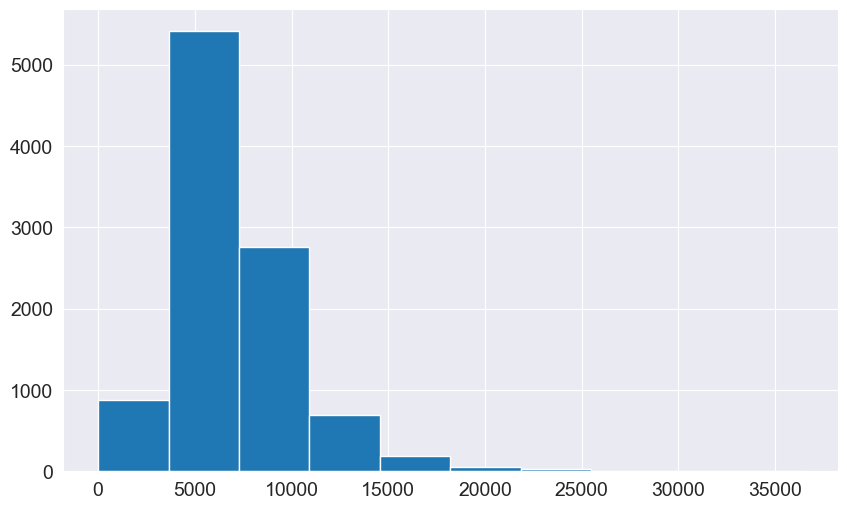

In [63]:

plt.hist(merged_df.Sales.sample(10000))

### Visualization

We can visualize individual trees using `plot_tree` (note: this requires the `graphviz` library to be installed).

In [77]:
from xgboost import plot_tree
from matplotlib.pylab import rcParams
%matplotlib inline

rcParams['figure.figsize'] = 30,30

In [78]:
import graphviz

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

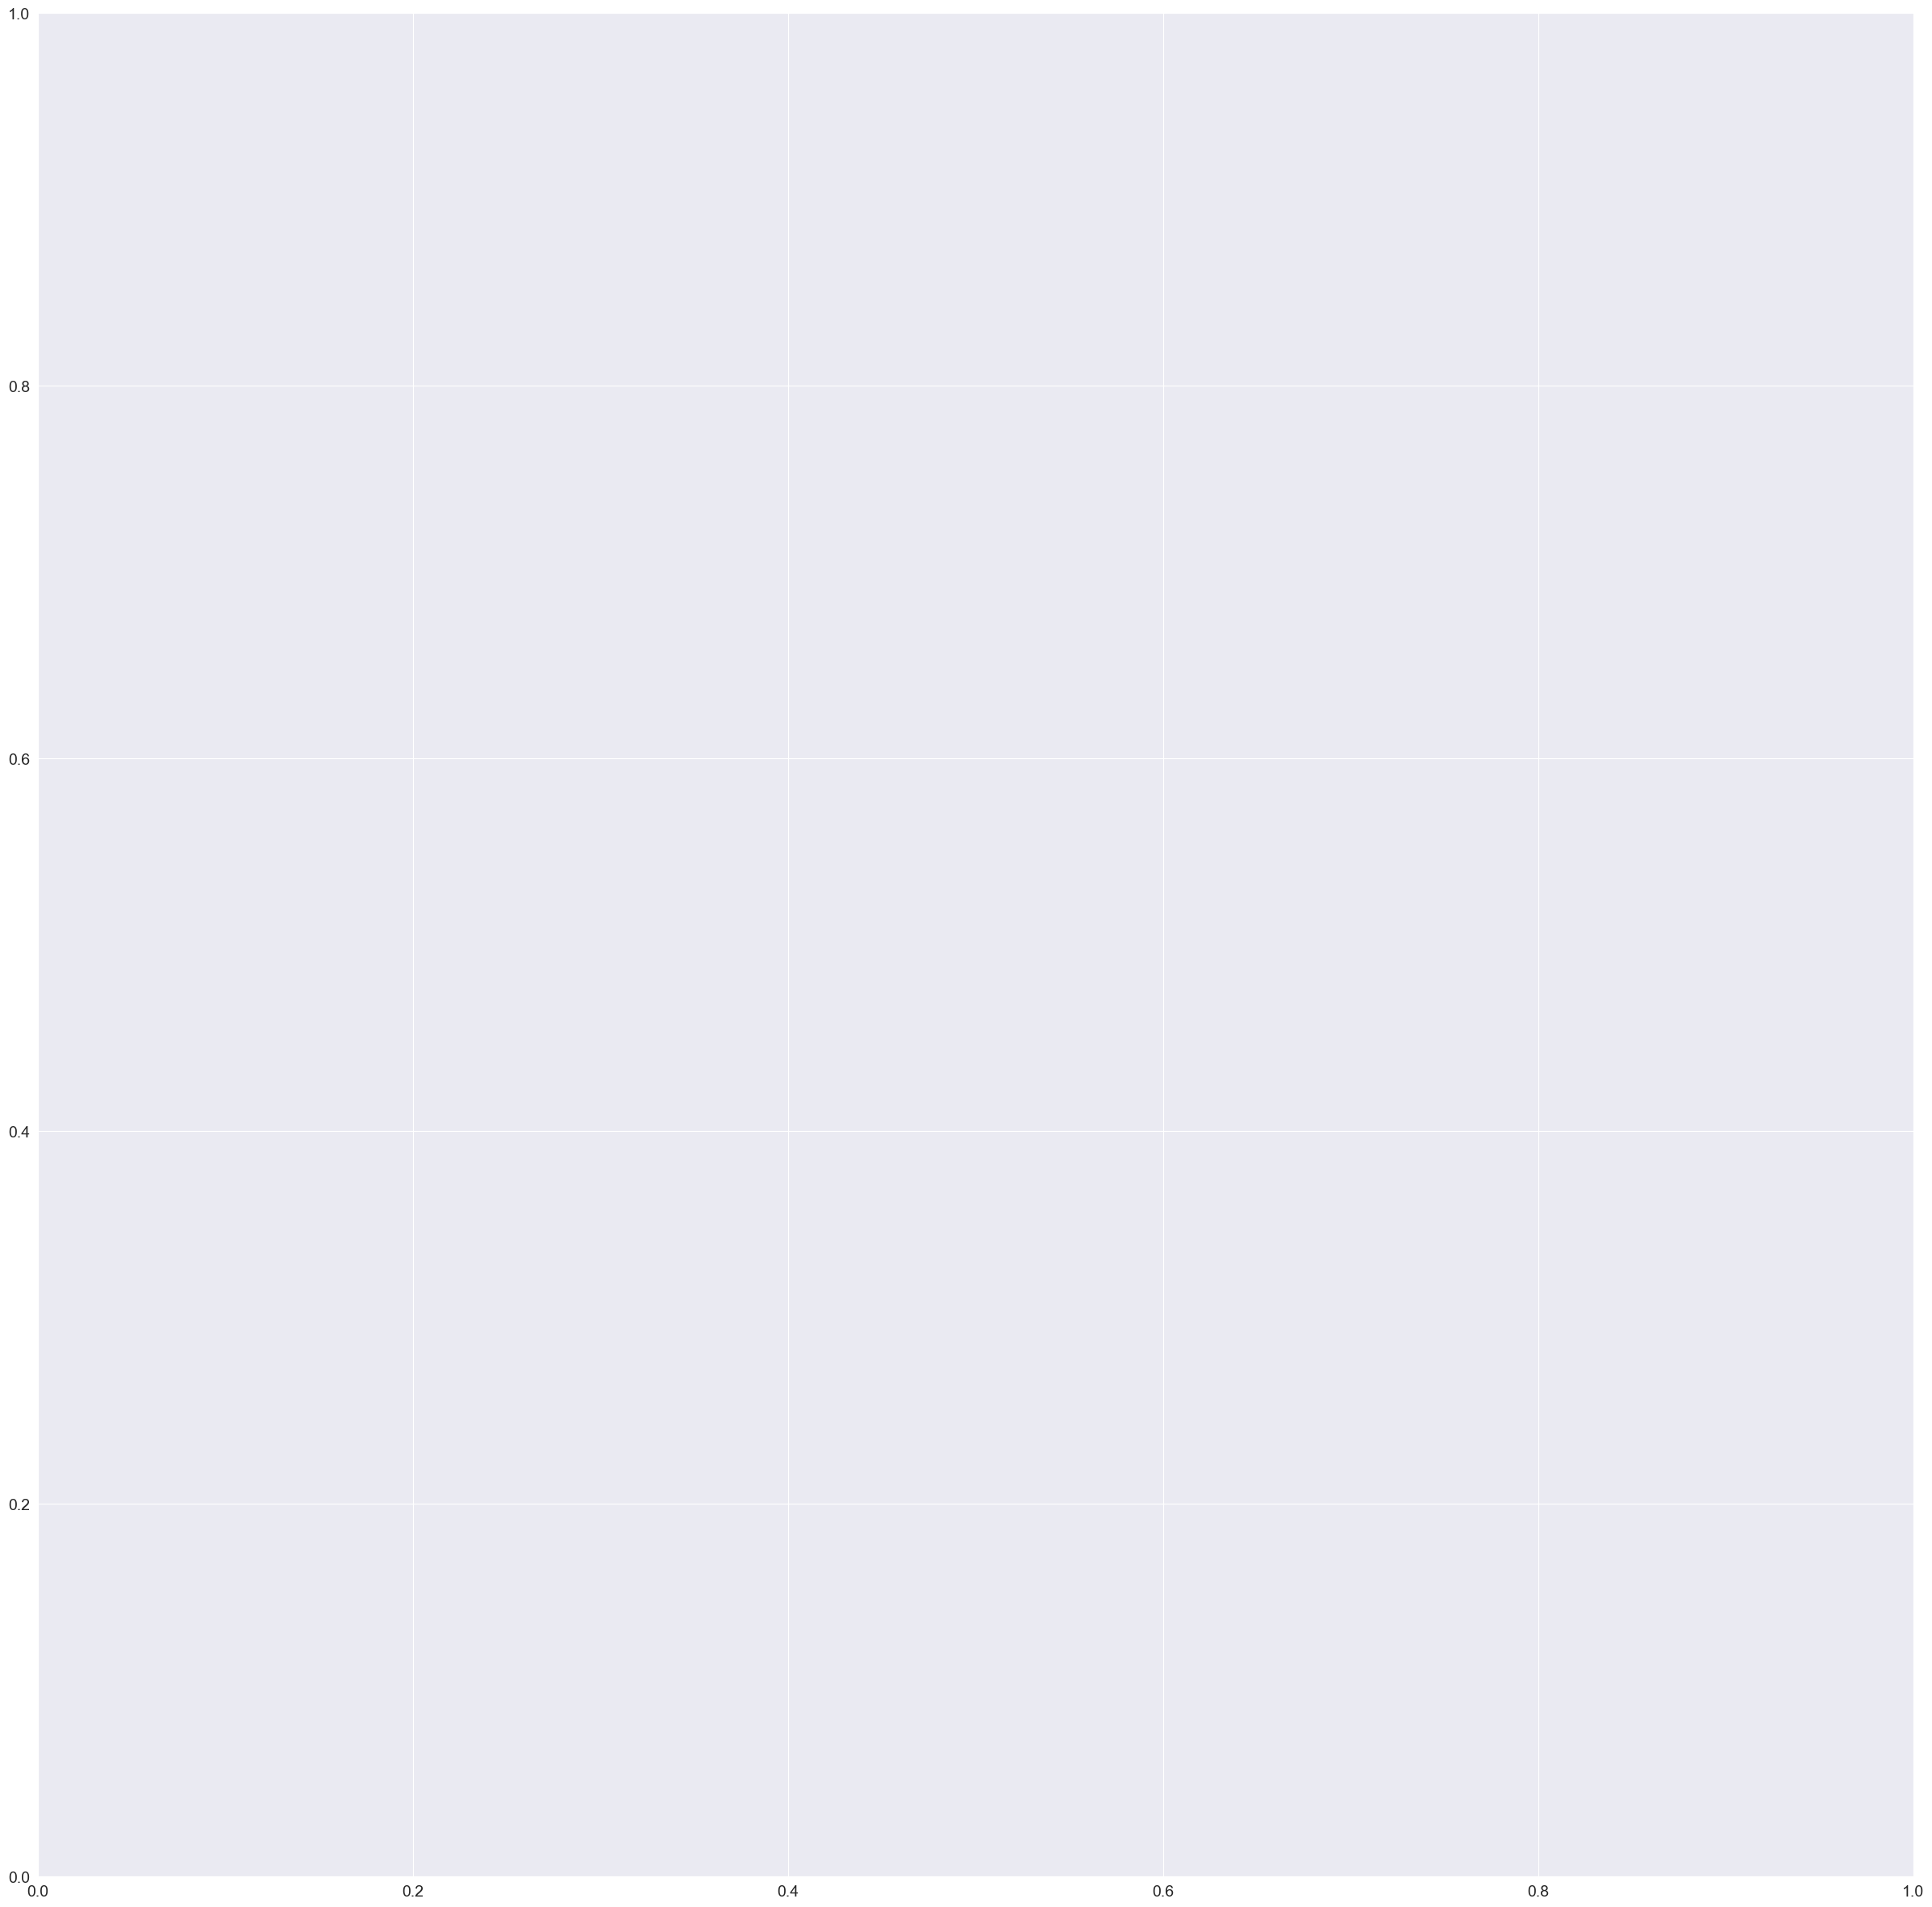

In [79]:
plot_tree(model, rankdir='LR', num_trees=1)

In [81]:
trees = model.get_booster().get_dump()


['0:[Promo<0.5] yes=1,no=2,missing=1\n\t1:[StoreType_b<0.5] yes=3,no=4,missing=3\n\t\t3:[Assortment_a<0.5] yes=7,no=8,missing=7\n\t\t\t7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15\n\t\t\t\t15:leaf=2309.51147\n\t\t\t\t16:leaf=1823.30444\n\t\t\t8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17\n\t\t\t\t17:leaf=1619.43994\n\t\t\t\t18:leaf=2002.44897\n\t\t4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9\n\t\t\t9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19\n\t\t\t\t19:leaf=2740.44067\n\t\t\t\t20:leaf=5576.85889\n\t\t\t10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21\n\t\t\t\t21:leaf=1898.36487\n\t\t\t\t22:leaf=2961.08765\n\t2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5\n\t\t5:[month<0.954545498] yes=11,no=12,missing=11\n\t\t\t11:[StoreType_b<0.5] yes=23,no=24,missing=23\n\t\t\t\t23:leaf=2295.30566\n\t\t\t\t24:leaf=3294.27759\n\t\t\t12:[day<0.333333343] yes=25,no=26,missing=25\n\t\t\t\t25:leaf=2754.58521\n\t\t\t\t26:leaf=3246.39014\n\t\t6:[month<0.95454549

In [82]:
len(trees)

20

In [84]:
print(trees[0])

0:[Promo<0.5] yes=1,no=2,missing=1
	1:[StoreType_b<0.5] yes=3,no=4,missing=3
		3:[Assortment_a<0.5] yes=7,no=8,missing=7
			7:[CompetitionDistance<0.00220830599] yes=15,no=16,missing=15
				15:leaf=2309.51147
				16:leaf=1823.30444
			8:[WeekOfYear<0.911764741] yes=17,no=18,missing=17
				17:leaf=1619.43994
				18:leaf=2002.44897
		4:[CompetitionDistance<0.00800922886] yes=9,no=10,missing=9
			9:[CompetitionDistance<0.00672379695] yes=19,no=20,missing=19
				19:leaf=2740.44067
				20:leaf=5576.85889
			10:[DayOfWeek_7<0.5] yes=21,no=22,missing=21
				21:leaf=1898.36487
				22:leaf=2961.08765
	2:[DayOfWeek_1<0.5] yes=5,no=6,missing=5
		5:[month<0.954545498] yes=11,no=12,missing=11
			11:[StoreType_b<0.5] yes=23,no=24,missing=23
				23:leaf=2295.30566
				24:leaf=3294.27759
			12:[day<0.333333343] yes=25,no=26,missing=25
				25:leaf=2754.58521
				26:leaf=3246.39014
		6:[month<0.954545498] yes=13,no=14,missing=13
			13:[CompetitionDistance<0.00135135138] yes=27,no=28,missing=27
				27:le

### Feature importance

Just like decision trees and random forests, XGBoost also provides a feature importance score for each column in the input.

In [85]:
importance_df= pd.DataFrame({
    'feature': X.columns,
    'importance':model.feature_importances_
}).sort_values('importance', ascending=False)

In [86]:
importance_df.head(10)

,feature,importance
1,Promo,0.334828
24,StoreType_b,0.085937
12,DayOfWeek_1,0.081593
5,Promo2,0.063616
3,CompetitionDistance,0.044753
29,Assortment_c,0.039999
0,Store,0.038869
27,Assortment_a,0.038608
9,month,0.036874
2,SchoolHoliday,0.035441


<AxesSubplot: title={'center': 'Feature Importance'}, xlabel='importance', ylabel='feature'>

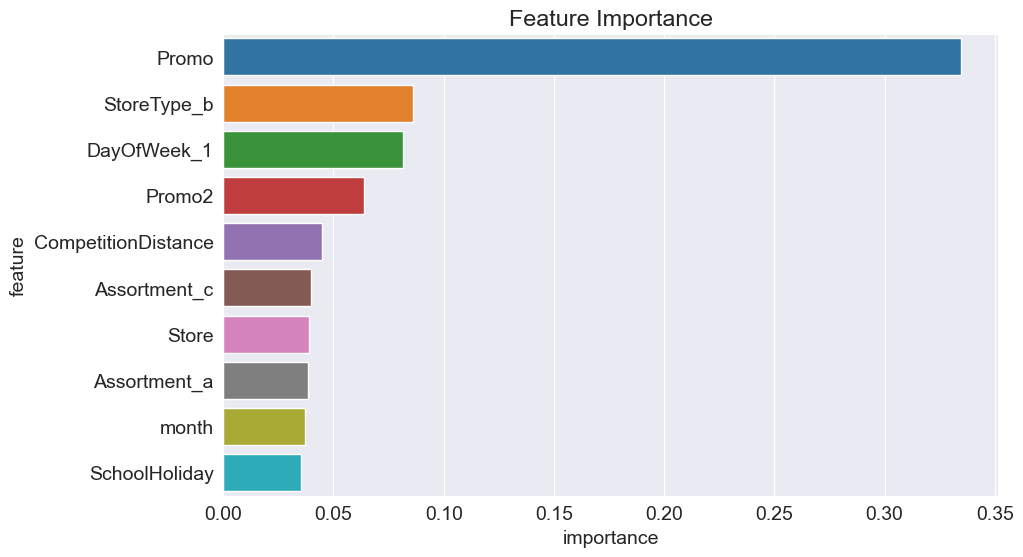

In [89]:
import seaborn as sns
plt.figure(figsize=(10,6))
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature')


## K Fold Cross Validation

Notice that we didn't create a validation set before training our XGBoost model. We'll use a different validation strategy this time, called K-fold cross validation ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

![](https://vitalflux.com/wp-content/uploads/2020/08/Screenshot-2020-08-15-at-11.13.53-AM.png)

Scikit-learn provides utilities for performing K fold cross validation.



In [64]:
from sklearn.model_selection import KFold

Let's define a helper function `train_and_evaluate` which trains a model the given parameters and returns the trained model, training error and validation error.

In [65]:
def train_and_evaluate(X_train, train_targets,X_val,val_targets, **params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params)
    model.fit(X_train,train_targets)
    train_rmse = rmse(model.predict(X_train), train_targets)
    val_rmse = rmse(model.predict(X_val), val_targets)
    return model, train_rmse, val_rmse


Now, we can use the `KFold` utility to create the different training/validations splits and train a separate model for each fold.

In [92]:
kfold = KFold(n_splits=5)

In [93]:
models=[]
for train_idxs, val_idxs in kfold.split(X):
    X_train, train_targets = X.iloc[train_idxs], targets.iloc[train_idxs]
    X_val, val_targets = X.iloc[val_idxs], targets.iloc[val_idxs]
    model, train_rmse,val_rmse = train_and_evaluate(X_train,
                                                   train_targets,
                                                   X_val,val_targets,
                                                   max_depth=4,
                                                   n_estimators=20)
    models.append(model)
    print("Train RMSE:{}, Validation RMSE:{}".format(train_rmse,val_rmse))

Train RMSE:2352.25307174321, Validation RMSE:2425.4855474004116
Train RMSE:2397.5789200653003, Validation RMSE:2437.723084188364
Train RMSE:2365.7321851723577, Validation RMSE:2337.3675610940063
Train RMSE:2366.5475914166336, Validation RMSE:2461.3683190105603
Train RMSE:2373.089763100142, Validation RMSE:2430.3202032856343


Let's also define a function to average predictions from the 5 different models.



In [94]:
import numpy as np

def predict_avg(models, inputs):
    return np.mean([model.predict(inputs) for model in models], axis=0)
    

In [95]:
preds = predict_avg(models,X)
preds

array([8050.0166, 7608.3643, 8749.434 , ..., 7297.542 , 7764.585 ,
       9332.377 ], dtype=float32)

We can now use predict_avg to make predictions for the test set.



## Hyperparameter Tuning and Regularization

Just like other machine learning models, there are several hyperparameters we cause n to adjust the capacity of model and reduce overfitting.

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Check out the following resources to learn more about hyperparameter supported by XGBoost:

- https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor
- https://xgboost.readthedocs.io/en/latest/parameter.html

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_val, y_train, y_val = train_test_split(X, targets, test_size=0.1)

In [68]:
def test_params(**params):
    model = XGBRegressor(n_jobs=-1, random_state=42, **params)
    model.fit(X_train, y_train)
    train_rmse = rmse(model.predict(X_train), y_train)
    val_rmse = rmse(model.predict(X_val), y_val)
    print('Train RMSE: {}, Validation RMSE: {}'.format(train_rmse, val_rmse))

#### `n_estimators`

The number of trees to be created. More trees = greater capacity of the model.

In [102]:
test_params(n_estimators=10)

Train RMSE: 2360.685721784237, Validation RMSE: 2361.394869944705


In [103]:
test_params(n_estimators=30)

Train RMSE: 1874.3874101981926, Validation RMSE: 1885.8749484014743


In [104]:
test_params(n_estimators=250)

Train RMSE: 894.9892485358723, Validation RMSE: 919.7163662597359


#### `max_depth`

As you increase the max depth of each tree, the capacity of the tree increases and it can capture more information about the training set.

In [ ]:
test_params(max_depth=2)

In [105]:
test_params(max_depth=10)


Train RMSE: 714.1681600103047, Validation RMSE: 813.0870042220141


#### `learning_rate`

The scaling factor to be applied to the prediction of each tree. A very high learning rate (close to 1) will lead to overfitting, and a low learning rate (close to 0) will lead to underfitting.

In [107]:
test_params(n_estimators=50, learning_rate=0.3)


Train RMSE: 1574.4684172503055, Validation RMSE: 1586.7926809460891


In [106]:
test_params(n_estimators=50, learning_rate=0.9)


Train RMSE: 1108.5590529707617, Validation RMSE: 1119.1706022601775


#### `booster`

Instead of using Decision Trees, XGBoost can also train a linear model for each iteration. This can be configured using `booster`.

In [108]:
test_params(booster='gblinear')

Train RMSE: 2729.4019670152693, Validation RMSE: 2717.703779831675


> **ToImproveMore**: We can exeperiment with other hyperparameters like `gamma`, `min_child_weight`, `max_delta_step`, `subsample`, `colsample_bytree` etc. and find their optimal values. we can learn more about them here: https://xgboost.readthedocs.io/en/latest/python/python_api.html#xgboost.XGBRegressor

## Putting it Together and Making Predictions

Let's train a final model on the entire training set with custom hyperparameters. 

In [73]:
model = XGBRegressor(n_jobs=-1, random_state=42, n_estimators=1000, 
                     learning_rate=0.2, max_depth=10, subsample=0.9, 
                     colsample_bytree=0.7)

In [74]:
model.fit(X, targets)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [98]:
train_preds = model.predict(X_train)
train_preds

array([5395.772 , 4932.92  , 9492.033 , ..., 3745.888 , 7073.8164,
       6108.4   ], dtype=float32)

In [100]:
mean_squared_error(train_preds, y_train, squared=False)

388.2401537374975

In [75]:
rmse(model.predict(X_train), y_train), rmse(model.predict(X_val), y_val)

(388.2401537374975, 386.2111800685888)

In [76]:
test_preds = model.predict(X_test)
test_preds

array([ 4293.873,  7335.213,  9402.783, ...,  6415.326, 21861.53 ,
        8053.459], dtype=float32)

In [77]:
len(test_preds)

41088

In [97]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error

In [78]:
from sklearn.metrics import accuracy_score

In [87]:
model.score(X_train, y_train)

0.9843846412914841

In [88]:
model.score(X_val, y_val)

0.9842769248884434

In [114]:
submission_df

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
41083,41084,0
41084,41085,0
41085,41086,0
41086,41087,0


### Looking at individual predictions

In [81]:
submission_df['Sales'] = test_preds
submission_df

,Id,Sales
0,1,4293.873047
1,2,7335.212891
2,3,9402.783203
3,4,7464.186035
4,5,6617.726074
...,...,...
41083,41084,2661.065674
41084,41085,7734.681152
41085,41086,6415.326172
41086,41087,21861.529297


Recall, however, if if the store is not open, then the sales must be 0. Thus, wherever the value of `Open` in the test set is 0, we can set the sales to 0. Also, there some missing values for `Open` in the test set. We'll replace them with 1 (open).

In [83]:
submission_df['Sales'] = submission_df['Sales'] * test_df.Open.fillna(1)
submission_df

,Id,Sales
0,1,4293.873047
1,2,7335.212891
2,3,9402.783203
3,4,7464.186035
4,5,6617.726074
...,...,...
41083,41084,2661.065674
41084,41085,7734.681152
41085,41086,6415.326172
41086,41087,21861.529297


In [84]:
submission_df.to_csv('submission.csv', index=None)

In [85]:
from IPython.display import FileLink

In [86]:
FileLink('submission.csv')

C:\Users\snikh\myvenv\MachineLearningAlgo\submission.csv

### Model Deployment

At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

In [93]:
import pickle

In [94]:
model

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.2, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=10, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=-1,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [95]:
with open('xgboost_model.pkl','wb') as model_file:
    pickle.dump(model, model_file)

### To load the saved model back into your Python environment

In [96]:
with open('xgboost_model.pkl', 'rb') as model_file:
    loaded_model = pickle.load(model_file)
    